In [4]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
          'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.solvers.gks import *

Deblur = Deblurring()
imagesize_x = 128
imagesize_y = 128
A = Deblur.forward_Op([11,11], 0.5, imagesize_x, imagesize_y)
choose_image = 'satellite128'
generate_matrix = 'False'
x_true = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, e) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
b_vec = b.reshape((-1,1))

generating basis...: 100%|██████████| 30/30 [00:00<00:00, 59.51it/s] 


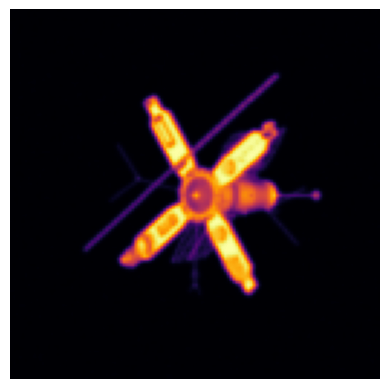

0.9903170771986158

<Figure size 640x480 with 0 Axes>

In [5]:
projection_dim = 30
(U, B, V) = generalized_golub_kahan(A, b_vec, projection_dim)
VV = V
UU = U[:, 0:-1]
HH = B[0:-1, :]
bhat = UU.T.dot(b_vec)
y_tikh = np.linalg.solve(HH.T*HH, bhat)
x_GKahan = VV.dot(y_tikh)
Deblur.plot_rec(x_GKahan.reshape(imagesize_x, imagesize_y))
np.linalg.norm(x_GKahan.reshape((-1,1))-x_true.reshape((-1,1)))/np.linalg.norm(x_true.reshape((-1,1)))

In [6]:
np.linalg.norm(x_GKahan.reshape((-1,1))-x_true.reshape((-1,1)))/np.linalg.norm(x_true.reshape((-1,1)))


0.9903170771986158